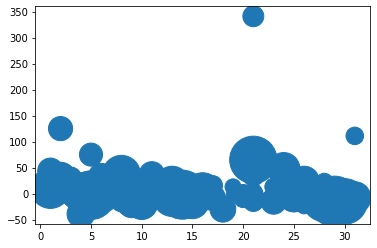

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Añadir semilla por si se quiere replicar y utilizar el mismo conjunto de datos.
np.random.seed(0)

# Seleccionamos el primero millón de filas.
df = pd.read_csv("../../data/Cap 8/base_datos_2008.csv", nrows=1000000)
# Se mezclan y seleccionamos solo las primeras 100
df = df.sample(frac=1).head(100)

# Día del mes del vuelo, el retraso del vuelo a su llegada y por último la distancia recorrida

plt.scatter(x = df.DayofMonth, y = df.ArrDelay, s = df.Distance)

# sns.set(rc={'figure.figsize':(8,5)})

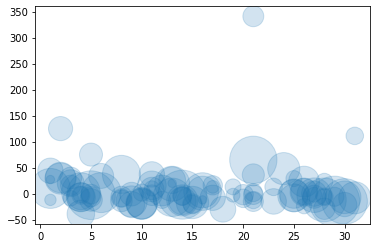

In [2]:
# El gráfico no es demasiado atractivo, lo modificamos.
# Alpha es un parámetro que hace que las burbujas sean translúcidas (0..1)

plt.scatter(x = df.DayofMonth, y = df.ArrDelay, s = df.Distance, alpha = .2)

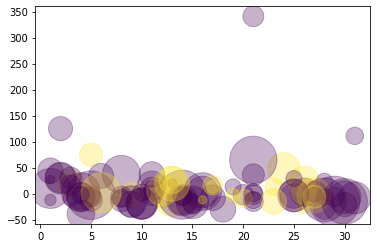

In [3]:
# El gráfico no es demasiado atractivo, lo modificamos.
# Añadimos ahora una diferenciación para los fines de semana, código isin 6 y 7 (sábado y domingo)

plt.scatter(x = df.DayofMonth, y = df.ArrDelay, s = df.Distance, alpha = .3, c = df.DayOfWeek.isin([6,7]))

Text(0, 0.5, 'Retraso al Llegar')

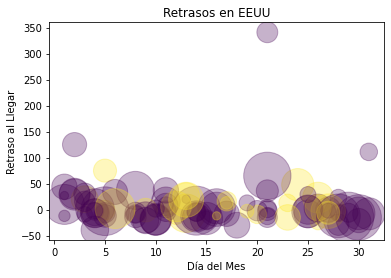

In [4]:
# Los colores morados corresponden con los días de entre semana y los más claros los de fines de semana.
# Añadimos más información, Título, Eje X, Eje Y

plt.scatter(x = df.DayofMonth, y = df.ArrDelay, s = df.Distance, alpha = .3, c = df.DayOfWeek.isin([6,7]))
plt.title("Retrasos en EEUU")
plt.xlabel("Día del Mes")
plt.ylabel("Retraso al Llegar")

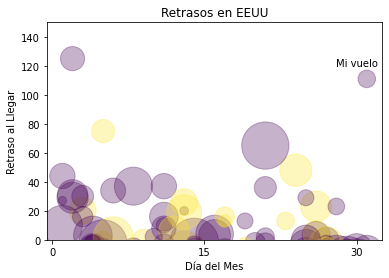

In [5]:
# Los morados corresponden con los días de entre semana y los amarillos los de fines de semana.
# Añadimos más información, Título, Eje X, Eje Y

plt.scatter(x = df.DayofMonth, y = df.ArrDelay, s = df.Distance, alpha = .3, c = df.DayOfWeek.isin([6,7]))
plt.title("Retrasos en EEUU")
plt.xlabel("Día del Mes")
plt.ylabel("Retraso al Llegar")

# Añadimos un límite a la escala vertical
plt.ylim([0, 150])
# Cambiamos el número de marcas en el eje X
plt.xticks([0,15,30])
# Por último añado un texto en el gráfico... mi vuelo que llegó casi 2 horas tarde.
plt.text(x=28, y=120, s= "Mi vuelo")
plt.show()

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Seleccionamos las 100.000  primeras filas.
df = pd.read_csv("../../data/Cap 8/base_datos_2008.csv", nrows=100000)
# Construimos una tabla resumen con los vuelos que han salido cada día de la semana
data = np.unique(df.DayOfWeek, return_counts = True)
labs = ["Lun", "Mar", "Mie", "Jue", "Vie", "Sab", "Dom"]

data

(array([1, 2, 3, 4, 5, 6, 7], dtype=int64),
 array([14519, 14710, 14694, 17079, 14517, 11285, 13196], dtype=int64))

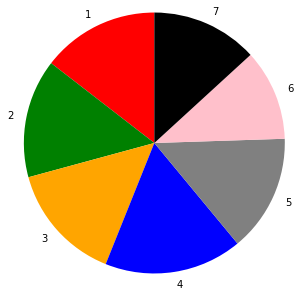

In [7]:
# A continuación damos forma a los vuelos en formato diagrama de tarta
# Partimos del siguiente...

plt.pie(x=data[1], 
       labels = data[0],
       radius = 1.5,
       colors = ["Red", "Green", "Orange", "Blue", "Gray", "Pink", "Black"],
       startangle = 90)

plt.show()


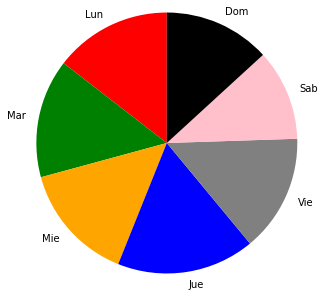

In [8]:
# Vamos a ir modificando cosas...
# Primero las etiquetas de los datos con el objeto labs, creado anteriormente.

plt.pie(x=data[1], 
       labels = labs,
       radius = 1.5,
       colors = ["Red", "Green", "Orange", "Blue", "Gray", "Pink", "Black"],
        startangle = 90)

plt.show()

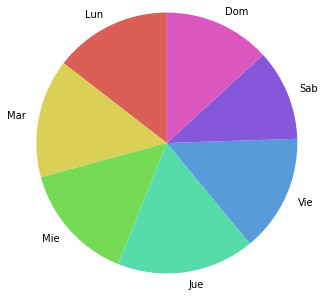

In [9]:
# Vamos a ir modificando cosas...
# Seleccionamos a continuación una paleta de colores distinta, una predefinida.

plt.pie(x=data[1], 
       labels = labs,
       radius = 1.5,
       colors = sns.color_palette("hls",7),
        startangle = 90)

plt.show()

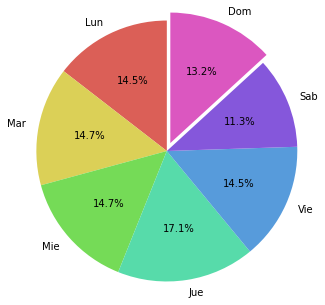

In [10]:
# Vamos a ir modificando cosas...
# Ahora mediante la instrucción explode vamos a desmarcar algunas de los diagramas de tarta.
# Hemos extraído el último día (domingo) del centro del diagrama de tarta.
# E incluimos los porcentajes dentro del diagrama correspondiente a los vuelos que han salido cada día (autopct).
# Por último añadimos una leyenda al gráfico.

plt.pie(x=data[1], 
      labels = labs,
       radius = 1.5,
       colors = sns.color_palette("hls",7),
        explode = (0,0,0,0,0,0,0.1),
        startangle = 90,
       autopct = "%1.1f%%")
#plt.legend(loc="center right", labels = labs)
#plt.legend(loc="best", labels = labs)
plt.show()

[Text(0.5, 0, 'Día de la Semana'), Text(0, 0.5, 'Número de Vuelos')]

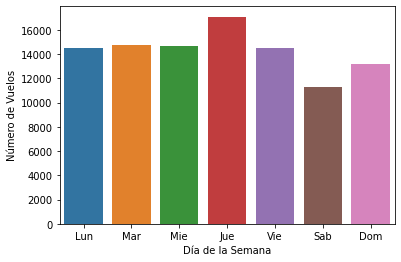

In [11]:
# Construimos ahora un diagrama de barras

plt = sns.barplot(x = labs, y = data[1])
plt.set(xlabel = "Día de la Semana", ylabel = "Número de Vuelos")


In [12]:
import numpy as np
import seaborn as sns
import pandas as pd
import datetime
import time

# Cargamos la BD completa de vuelos.
df = pd.read_csv("../../data/Cap 8/base_datos_2008.csv")
# Cargamos un segundo dataframe con los vuelos origen de ATL, HOU, IND
df2 = df[df["Origin"].isin(["ATL", "HOU", "IND"])]
# Por último otro dataframe de 500.000 casos del dataframe original
df = df.head(500000)

times = []

for i in np.arange(len(df)):
    times.append(datetime.datetime(year=2008, month = df.loc[i, "Month"], day = df.loc[i, "DayofMonth"]))
    
# No hemos incluido hora y minuto.

In [13]:
# Vemos el elemento 50.000 de la lista
times[50000]

datetime.datetime(2008, 1, 18, 0, 0)

In [14]:
df["Time"] = times

# Agrupamos el dataframe creado Time, sin crear índice y calculamos la media de retraso en partida y en llegada.

data = df.groupby(by=["Time"], as_index = False)["DepDelay", "ArrDelay"].mean()
data.head(10)

# El time está obtenido como index, 0,1,2,3...

C:\Users\feeadmin\AppData\Local\Temp/ipykernel_4112/1729981561.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = df.groupby(by=["Time"], as_index = False)["DepDelay", "ArrDelay"].mean()


,Time,DepDelay,ArrDelay
0,2008-01-01,20.545599,20.999240
1,2008-01-02,23.324222,22.131194
2,2008-01-03,16.697759,14.479569
3,2008-01-04,14.058087,11.851733
4,2008-01-05,18.381555,17.138031
5,2008-01-06,18.100518,16.176674
6,2008-01-07,12.897454,11.397793
7,2008-01-08,11.328345,10.469450
8,2008-01-09,4.647451,1.190418
9,2008-01-10,8.089982,6.776395


C:\Users\feeadmin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Time', ylabel='DepDelay'>

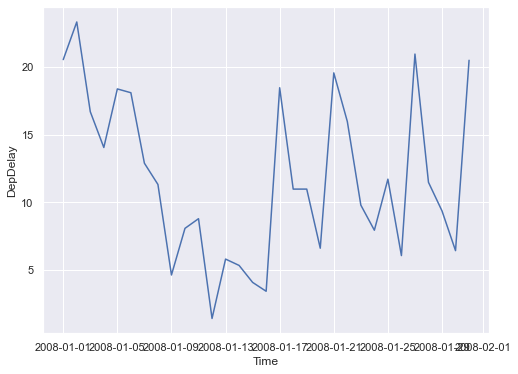

In [16]:
# A continuación realizamos el gráfico, puedo definir el tamaño del gráfico con sns.set
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(data["Time"], data["DepDelay"], size_order= 1)

In [19]:
# Suprimos el valor que nos determina no tener índice
sns.set(rc={'figure.figsize':(15,10)})
data = df.groupby(by=["Time"])["DepDelay", "ArrDelay"].mean()
data.head()
data.describe()

C:\Users\feeadmin\AppData\Local\Temp/ipykernel_4112/1251718273.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = df.groupby(by=["Time"])["DepDelay", "ArrDelay"].mean()


,DepDelay,ArrDelay
count,31.000000,31.000000
mean,11.740565,10.430569
std,6.072864,7.357784
min,1.436958,-4.563493
25%,6.534266,4.385122
50%,10.987452,10.022226
75%,17.399138,16.560355
max,23.324222,23.331864


<AxesSubplot:xlabel='Time'>

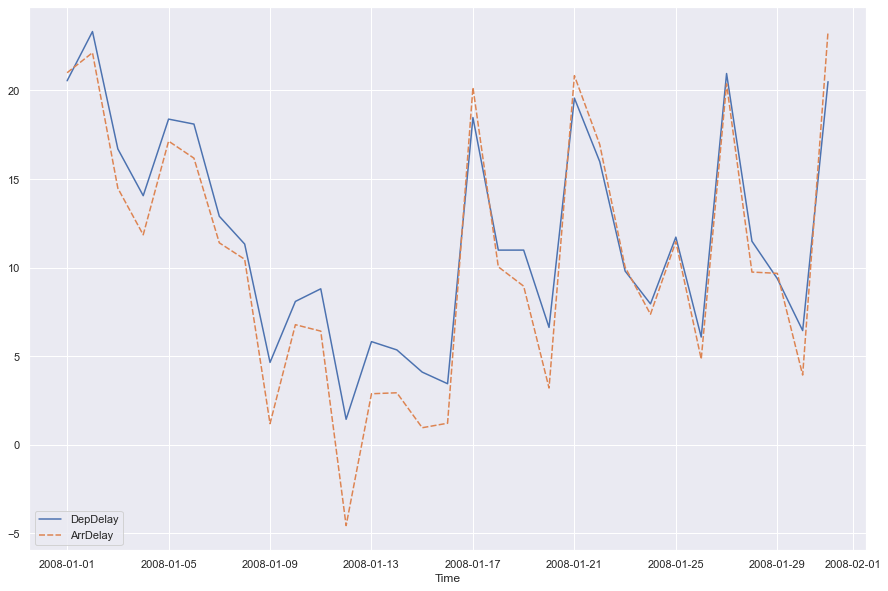

In [20]:
# En este caso no indicamos los valores de X e Y, por tanto da lugar a que representemos más de una serie temporal.
sns.lineplot(data = data)

In [21]:
df2 = df[df["Origin"].isin(["ATL", "HOU", "IND"])]
times = []

for i in df2.index:
    times.append(datetime.datetime(year = 2008, month = df2.loc[i,"Month"], day = df2.loc[i,"DayofMonth"]))
df2["Time"] = times


C:\Users\feeadmin\AppData\Local\Temp/ipykernel_4112/617910719.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Time"] = times


<AxesSubplot:xlabel='Time', ylabel='ArrDelay'>

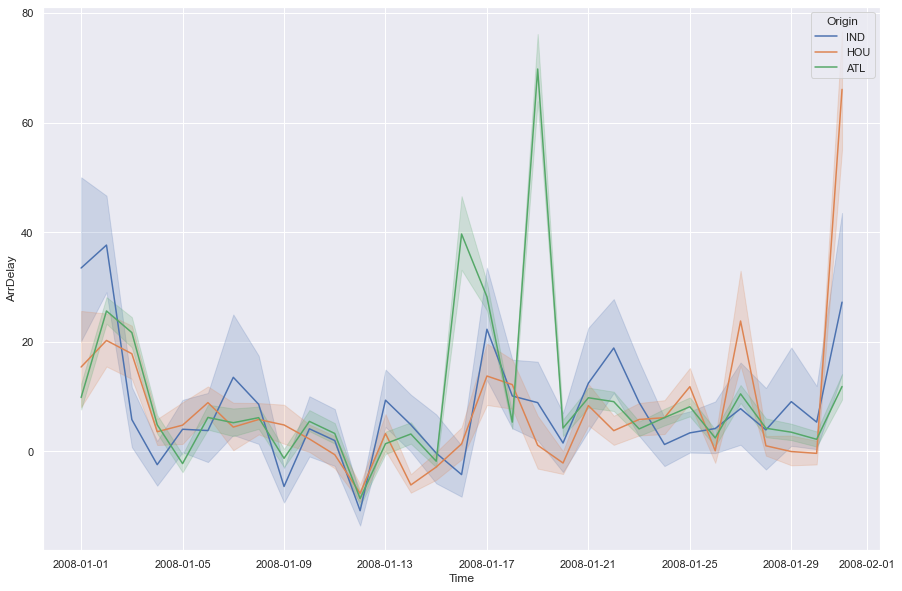

In [22]:
sns.set(rc={'figure.figsize':(15,10)})

sns.lineplot(x = "Time", y = "ArrDelay", hue = "Origin", data = df2)